# Modular Exploratory Data Analysis of News Articles

This notebook demonstrates the use of our custom utility classes for analyzing news articles data.

## Setup and Imports

In [1]:
import sys
sys.path.append('..')  # Add parent directory to Python path

# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import our utility classes
from src.utils.text_analyzer import TextAnalyzer
from src.utils.time_analyzer import TimeAnalyzer
from src.utils.publisher_analyzer import PublisherAnalyzer

sns.set_theme(style="whitegrid")  # This sets up the seaborn style
sns.set_context("notebook")  # This adjusts plot sizes for notebook
sns.set_palette("Set2")  # This sets the color palette

# Optional: Increase default figure size
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100


INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


## Initialize Analyzers

In [2]:
# Initialize our analyzer classes
text_analyzer = TextAnalyzer()
time_analyzer = TimeAnalyzer(date_column='date')
publisher_analyzer = PublisherAnalyzer(publisher_column='publisher')

## Load and Prepare Data

In [3]:
# Load the dataset
# Replace 'your_data.csv' with actual data file
df = pd.read_csv('../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')

print("Dataset Info:")
print(df.info())

print("\nSample Data:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None

Sample Data:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 1. Text Analysis

Analyze the textual content of headlines using our TextAnalyzer class.

analyzed huge DS
Text Statistics:
mean_length: 73.12051490484095
max_length: 512.0
min_length: 3.0
total_texts: 1407328


Processing text batches: 100%|██████████| 141/141 [00:57<00:00,  2.45it/s]



Most Common Words:
stocks: 161702
vs: 138835
eps: 128801
est: 122289
shares: 114140
reports: 108688
update: 91645
market: 91080
earnings: 87183
sales: 79528
top: 78493
benzinga: 74466
pt: 73059
announces: 66531
price: 64217


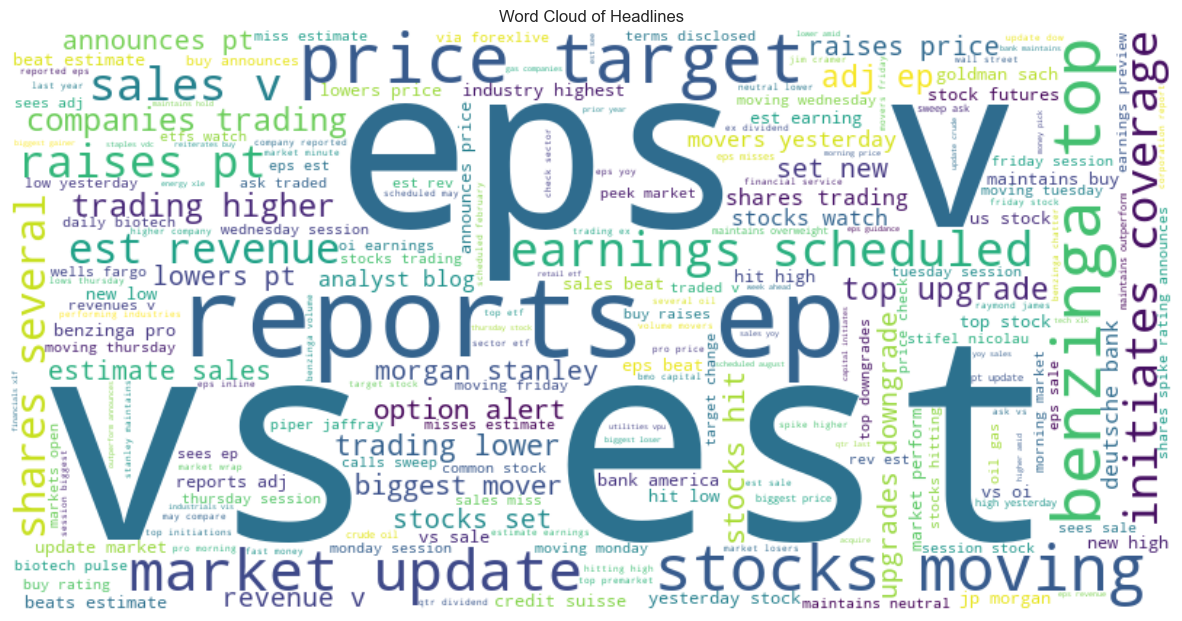


Top Topics:
Topic #1:
0.031*"shares" + 0.023*"update" + 0.019*"market" + 0.016*"trading" + 0.013*"higher" + 0.012*"us" + 0.011*"says" + 0.010*"stock" + 0.009*"lower" + 0.009*"companies" 

Topic #2:
0.052*"benzinga" + 0.025*"top" + 0.022*"pro" + 0.020*"check" + 0.013*"alert" + 0.013*"option" + 0.010*"upgrades" + 0.010*"downgrades" + 0.009*"western" + 0.009*"ask" 

Topic #3:
0.060*"price" + 0.044*"pt" + 0.035*"buy" + 0.033*"raises" + 0.032*"target" + 0.031*"maintains" + 0.023*"initiates" + 0.023*"downgrades" + 0.022*"neutral" + 0.021*"lowers" 

Topic #4:
0.081*"vs" + 0.069*"est" + 0.067*"eps" + 0.062*"reports" + 0.056*"earnings" + 0.056*"sales" + 0.023*"sees" + 0.020*"estimate" + 0.019*"scheduled" + 0.015*"revenue" 

Topic #5:
0.057*"stocks" + 0.038*"etfs" + 0.025*"sector" + 0.025*"etf" + 0.021*"energy" + 0.021*"retail" + 0.018*"utilities" + 0.017*"financials" + 0.017*"xlk" + 0.017*"xlf" 



In [27]:
# Get basic text statistics
text_stats = text_analyzer.get_text_statistics(df['headline'])
print("Text Statistics:")
for key, value in text_stats.items():
    print(f"{key}: {value}")

# Extract and display common words
common_words = text_analyzer.extract_common_words(df['headline'], top_n=15)
print("\nMost Common Words:")
for word, count in common_words:
    print(f"{word}: {count}")

# Generate and display word cloud
plt.figure(figsize=(15, 8))
wordcloud = text_analyzer.generate_wordcloud(df['headline'])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()

# Perform topic modeling
lda_model, corpus, dictionary = text_analyzer.perform_topic_modeling(df['headline'], num_topics=5)
print("\nTop Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic #{idx + 1}:")
    print(topic, "\n")

## 2. Time Series Analysis

Analyze temporal patterns using our TimeAnalyzer class.

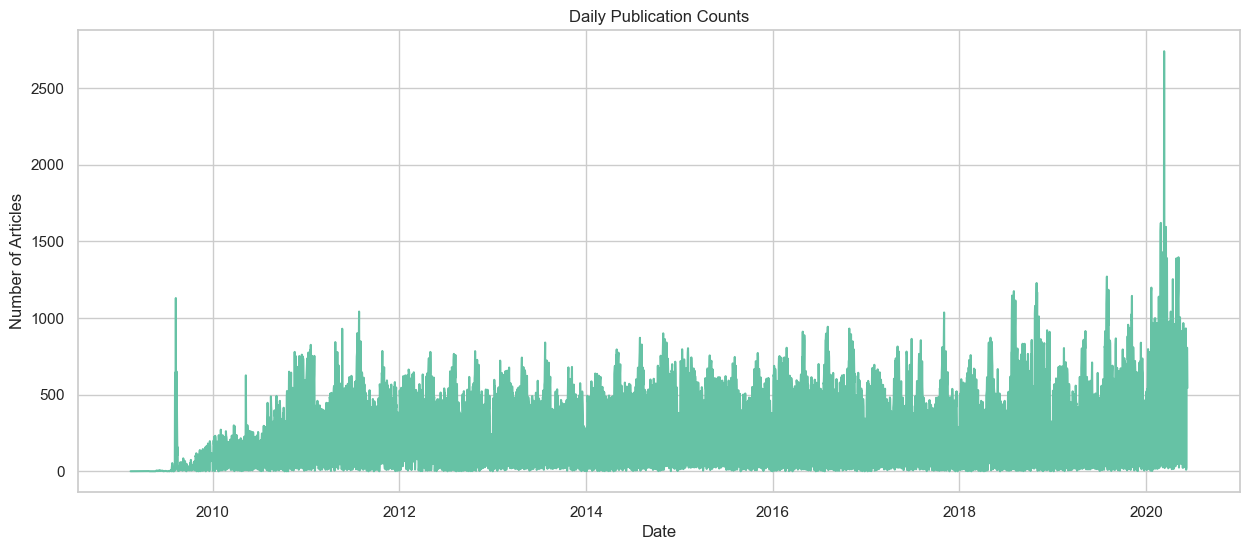

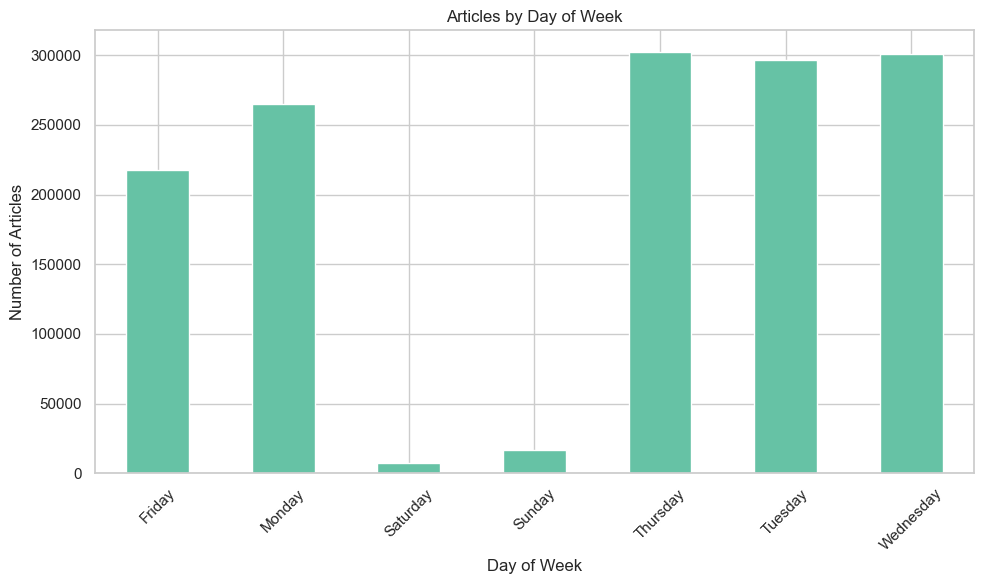

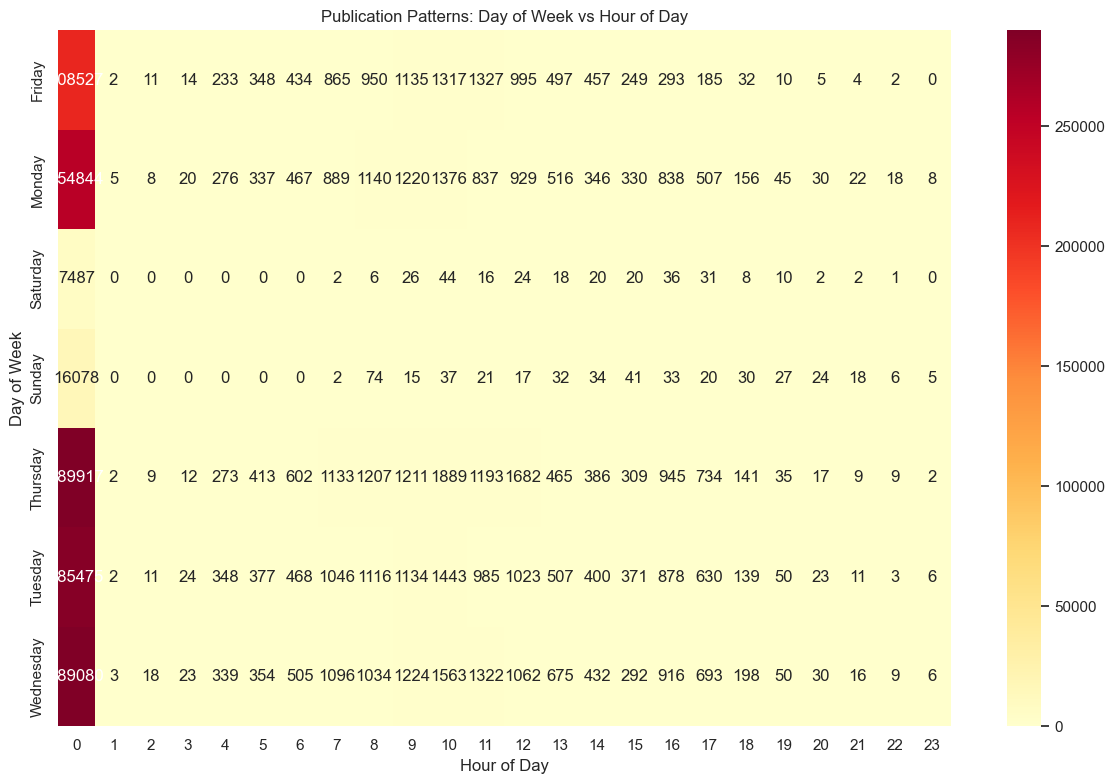


Temporal Density Metrics:
mean_time_between_publications: 0.07 hours
median_time_between_publications: 0.00 hours
max_time_between_publications: 1728.00 hours
min_time_between_publications: 0.00 hours


In [4]:
# Get publication patterns
time_patterns = time_analyzer.get_publication_patterns(df)

# Plot daily publication counts
plt.figure(figsize=(15, 6))
time_patterns['daily_counts'].plot()
plt.title('Daily Publication Counts')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Plot weekly patterns
plt.figure(figsize=(10, 6))
time_patterns['weekly_counts'].plot(kind='bar')
plt.title('Articles by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create publication heatmap
time_analyzer.create_heatmap(df)
plt.show()

# Analyze temporal density
density_metrics = time_analyzer.analyze_temporal_density(df)
print("\nTemporal Density Metrics:")
for key, value in density_metrics.items():
    if isinstance(value, pd.Timedelta):
        print(f"{key}: {value.total_seconds() / 3600:.2f} hours")
    else:
        print(f"{key}: {value}")

## 3. Publisher Analysis

Analyze publisher patterns using our PublisherAnalyzer class.

Publisher Statistics:
total_publishers: 1034

top_publishers:
  Paul Quintaro: 228373
  Lisa Levin: 186979
  Benzinga Newsdesk: 150484
  Charles Gross: 96732
  Monica Gerson: 82380
  Eddie Staley: 57254
  Hal Lindon: 49047
  ETF Professor: 28489
  Juan Lopez: 28438
  Benzinga Staff: 28114
articles_per_publisher_mean: 1361.0522243713733
articles_per_publisher_median: 11.0
most_active_publisher: Paul Quintaro
most_active_publisher_articles: 228373

Top Publishing Domains:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


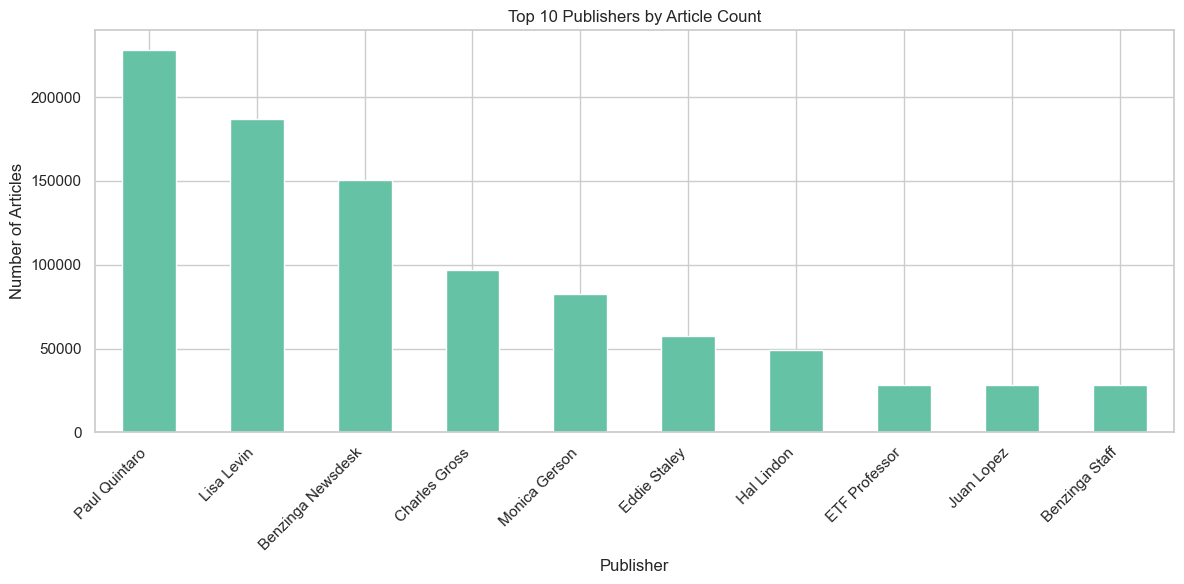

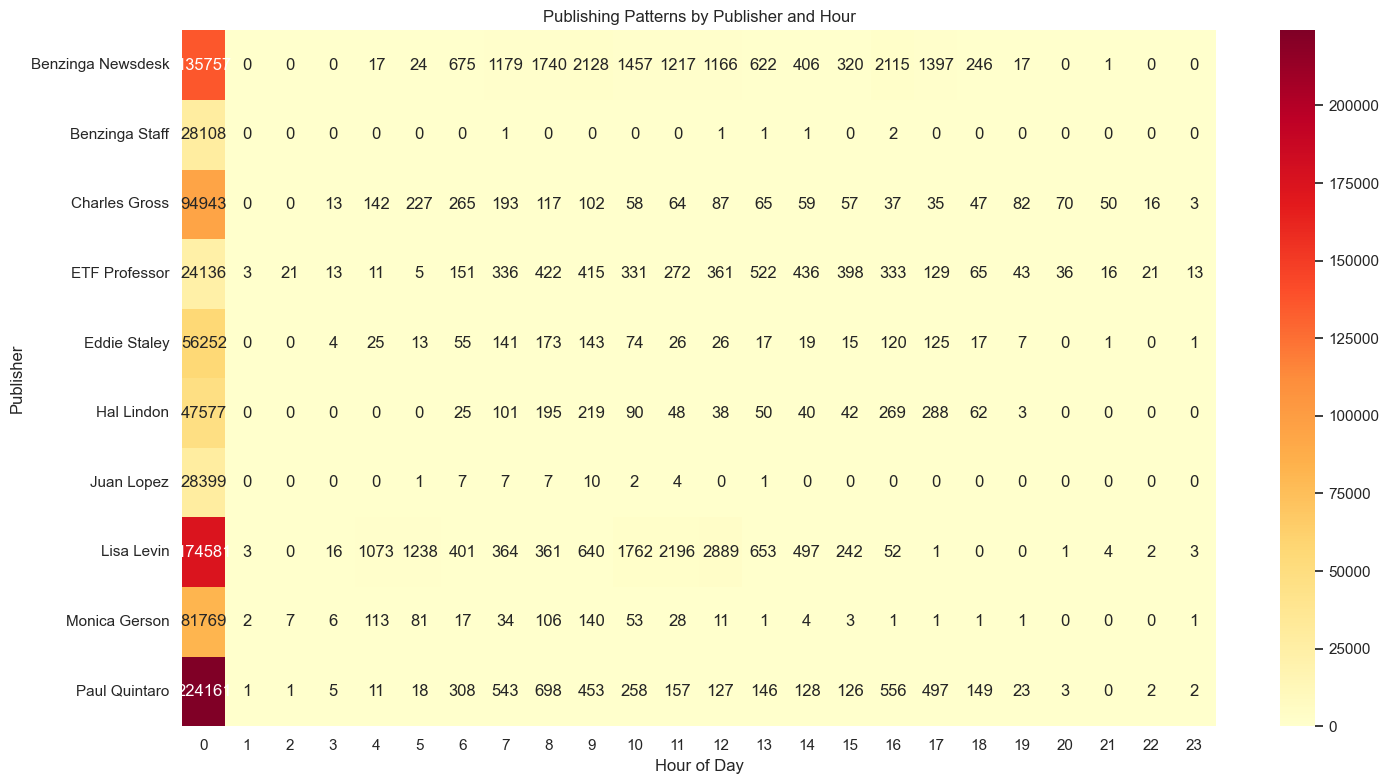

In [4]:
# Get publisher statistics
pub_stats = publisher_analyzer.get_publisher_statistics(df)
print("Publisher Statistics:")
for key, value in pub_stats.items():
    if isinstance(value, dict):
        print(f"\n{key}:")
        for k, v in value.items():
            print(f"  {k}: {v}")
    else:
        print(f"{key}: {value}")

# Analyze and plot publisher domains
domain_counts = publisher_analyzer.analyze_publisher_domains(df)
print("\nTop Publishing Domains:")
print(domain_counts.head(10))

# Plot top publishers
publisher_analyzer.plot_top_publishers(df)
plt.show()

# Analyze publisher patterns
pub_patterns = publisher_analyzer.analyze_publisher_patterns(df)

# Create heatmap of publisher patterns
plt.figure(figsize=(15, 8))
sns.heatmap(pub_patterns, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Publishing Patterns by Publisher and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

## Summary of Findings

Use this section to summarize key findings from your analysis:

1. Text Analysis:
   - Average headline length and common topics
   - Most frequent keywords and their implications

2. Time Analysis:
   - Peak publishing times
   - Weekly patterns
   - Any notable temporal trends

3. Publisher Analysis:
   - Most active publishers
   - Publishing patterns
   - Domain distribution